In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt
#from scipy.interpolate import UnivariateSpline
import scipy.interpolate

[ 2.3386909   3.21402451  4.08935812  4.96469174  5.84002535  6.71535896
  7.59069258  8.46602619  9.3413598  10.21669342 11.09202703 11.96736064
 12.84269425 13.71802787 14.59336148 15.46869509 16.34402871 17.21936232
 18.09469593 18.97002955] [ 14.22424906 -19.70027361   4.80228325  11.37713206 -13.93289181
 -13.06868581   5.01750782   5.22440277 -17.60327208  19.82264028
  -1.47332937   9.99408688 -16.0586461   11.59480833   4.01501123
 -16.3238543   19.86188205  -1.9779264    0.55181231  -2.63615745]
[ 3.63906546  4.5611144   5.55017428  8.35143834 11.50429895 11.93931968
 12.19726685 13.75632583 16.66091785 18.09906362]
[-72.10073854  93.74477965  -4.87128495 139.8132804  -19.0484948
   9.47981569  44.98407726  12.35134063  20.34759726   0.58391894]


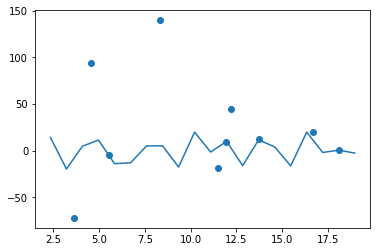

In [15]:
def read_data(filename):
    file = open(filename, 'r')
    inputData = [float(line) for line in file]
    file.close()
    return inputData

def write_data(filename, outputVec):
    file = open(filename, 'w')
    for ans in outputVec:
        file.write(str(ans) + '\n')
    file.close()
    return

def sweep(n, a, b, c, f):
    alpha = np.zeros(n)
    beta = np.zeros(n)
    for i in range(n - 1):
        d = a[i] * alpha[i] + b[i]
        alpha[i + 1] = -c[i] / d
        beta[i + 1] = (f[i] - a[i] * beta[i]) / d
    x = np.zeros(n)
    x[n - 1] = beta[n - 1]
    for i in range(n - 2, -1, -1):
        x[i] = alpha[i + 1] * x[i + 1] + beta[i + 1]
    return x

def generateSpline(x, y):
#    n = x.shape[0] - 1
    h = (x[n - 1] - x[0]) / n
    a = np.array([0] + [1] * (n - 2) + [0])
    b = np.array([1] + [4] * (n - 2) + [1])
    c = np.array([0] + [1] * (n - 2) + [0])
    f = np.zeros(n)
    for i in range(1, n - 1):
        f[i] = 3 * (y[i - 1] - 2 * y[i] + y[i + 1]) / h ** 2
    s = sweep(n + 1, a, b, c, f)
    A = np.zeros(n + 1)
    B = np.zeros(n + 1)
    C = np.zeros(n + 1)
    D = np.zeros(n + 1)
    for i in range(n - 1):
        B[i] = s[i]
        A[i] = (B[i + 1] - B[i]) / (3 * h)
        C[i] = (y[i + 1] - y[i]) / h - (B[i + 1] + 2 * B[i]) * h / 3
        D[i] = y[i]
    return A, B, C, D

def P(z):
    i = int(z)
    diff = z - x[i]
    return A[i] * diff ** 3 + B[i] * diff ** 2 + C[i] * diff + D[i]

x = np.array(read_data("train_for_spline_interpolation/train.dat"))
y = np.array(read_data("train_for_spline_interpolation/train.ans"))
z = np.array(read_data("test/test.dat"))
m = len(z)
n = len(x)

A, B, C, D = generateSpline(x, y)

#m = int(input())
#z = sorted(np.array([random.uniform(x[0], x[n - 1]) for i in range(m)]))
ans = np.zeros(m)
print(x, y)
print(z)
plt.plot
for i in range(m):
    ans[i] = P(z[i])
print(ans)
write_data("test.ans", ans)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(z, ans)
ax.plot(x, y)
fig.savefig("spline_interpolation.png")